In [1]:
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# print the sckit_learn version
import sklearn
sklearn.__version__

'0.21.3'

# generate the data for KNN
- generate values for class 0
  - generate 50 x1 values within range 0 to 50
  - generate 50 x2 values within range 1 to 50
  - create a 2d array with x1 values as 0 th element and x2 values as 1st element, 3rd element as zero
  - o/p--> [[2,5,0],[3,10,0],[24,12,0]]
- generate values for class 1
  - generate 50 x1 values within range 0 to 100
  - generate 50 x2 values within range 1 to 50
  - create a 2d array with x1 values as 0 th element and x2 values as 1st element, 3rd element as 1
- create a 2d array wich consists of both classes data
- create a dataframe from this data with added y column


In [8]:
np.random.seed(10)
x1=np.random.randint(0,50,50)
x2= np.random.randint(1,50,50)
x1,x2

(array([ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40, 36,
        16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25, 13, 28,
        22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23, 30, 11]),
 array([29, 11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34, 21,
        33, 25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,  7, 22,
        43, 23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34, 46, 41]))

In [9]:
np.hstack((x1,x2))

array([ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40, 36,
       16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25, 13, 28,
       22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23, 30, 11, 29,
       11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34, 21, 33,
       25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,  7, 22, 43,
       23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34, 46, 41])

In [10]:
np.vstack((x1,x2))

array([[ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40,
        36, 16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25,
        13, 28, 22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23,
        30, 11],
       [29, 11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34,
        21, 33, 25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,
         7, 22, 43, 23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34,
        46, 41]])

In [11]:
x1_2d = np.expand_dims(x1,1)
x2_2d = np.expand_dims(x2,1)
y_2d = np.expand_dims(np.zeros(50,dtype=int),1)

In [12]:
d0=np.hstack((x1_2d,x2_2d,y_2d))
d0

array([[ 9, 29,  0],
       [36, 11,  0],
       [15, 25,  0],
       [ 0, 10,  0],
       [49, 16,  0],
       [28, 19,  0],
       [25, 17,  0],
       [29,  8,  0],
       [48, 25,  0],
       [29, 12,  0],
       [49, 18,  0],
       [ 8, 47,  0],
       [ 9,  8,  0],
       [ 0, 12,  0],
       [42, 29,  0],
       [40, 34,  0],
       [36, 21,  0],
       [16, 33,  0],
       [36, 25,  0],
       [47, 45,  0],
       [11,  6,  0],
       [24,  5,  0],
       [43,  8,  0],
       [33, 25,  0],
       [ 8, 25,  0],
       [36, 45,  0],
       [14, 35,  0],
       [49, 41,  0],
       [13, 16,  0],
       [ 5, 14,  0],
       [13, 25,  0],
       [25, 16,  0],
       [13,  7,  0],
       [28, 22,  0],
       [22, 43,  0],
       [30, 23,  0],
       [30, 12,  0],
       [25, 49,  0],
       [12, 13,  0],
       [ 1, 29,  0],
       [31, 33,  0],
       [36, 16,  0],
       [27, 45,  0],
       [18, 41,  0],
       [29, 43,  0],
       [13, 46,  0],
       [22, 44,  0],
       [23, 3

In [13]:
np.random.seed(15)
x1=np.random.randint(50,100,50)
x2= np.random.randint(1,50,50)
x1_2d = np.expand_dims(x1,1)
x2_2d = np.expand_dims(x2,1)
y_2d = np.expand_dims(np.ones(50,dtype=int),1)
d1=np.hstack((x1_2d,x2_2d,y_2d))
d1

array([[58,  3,  1],
       [62, 43,  1],
       [55, 33,  1],
       [50, 38,  1],
       [78,  8,  1],
       [77, 25,  1],
       [57, 38,  1],
       [61, 46,  1],
       [71, 20,  1],
       [97, 49,  1],
       [79, 41,  1],
       [67, 30,  1],
       [95, 13,  1],
       [81, 25,  1],
       [73, 47,  1],
       [82, 13,  1],
       [60, 34,  1],
       [65,  3,  1],
       [54, 25,  1],
       [91, 45,  1],
       [89, 43,  1],
       [87, 18,  1],
       [69, 24,  1],
       [94, 30,  1],
       [63, 35,  1],
       [79, 24,  1],
       [65, 19,  1],
       [88, 27,  1],
       [65, 27,  1],
       [99, 17,  1],
       [51, 14,  1],
       [81, 27,  1],
       [82, 33,  1],
       [71,  7,  1],
       [76,  5,  1],
       [84, 29,  1],
       [61, 21,  1],
       [51, 36,  1],
       [90, 40,  1],
       [56, 29,  1],
       [91,  6,  1],
       [84,  1,  1],
       [90, 10,  1],
       [72, 49,  1],
       [90, 21,  1],
       [65, 47,  1],
       [78, 39,  1],
       [85, 3

In [14]:
data=np.vstack((d0,d1))
data

array([[ 9, 29,  0],
       [36, 11,  0],
       [15, 25,  0],
       [ 0, 10,  0],
       [49, 16,  0],
       [28, 19,  0],
       [25, 17,  0],
       [29,  8,  0],
       [48, 25,  0],
       [29, 12,  0],
       [49, 18,  0],
       [ 8, 47,  0],
       [ 9,  8,  0],
       [ 0, 12,  0],
       [42, 29,  0],
       [40, 34,  0],
       [36, 21,  0],
       [16, 33,  0],
       [36, 25,  0],
       [47, 45,  0],
       [11,  6,  0],
       [24,  5,  0],
       [43,  8,  0],
       [33, 25,  0],
       [ 8, 25,  0],
       [36, 45,  0],
       [14, 35,  0],
       [49, 41,  0],
       [13, 16,  0],
       [ 5, 14,  0],
       [13, 25,  0],
       [25, 16,  0],
       [13,  7,  0],
       [28, 22,  0],
       [22, 43,  0],
       [30, 23,  0],
       [30, 12,  0],
       [25, 49,  0],
       [12, 13,  0],
       [ 1, 29,  0],
       [31, 33,  0],
       [36, 16,  0],
       [27, 45,  0],
       [18, 41,  0],
       [29, 43,  0],
       [13, 46,  0],
       [22, 44,  0],
       [23, 3

In [15]:
df= pd.DataFrame(data,columns=['x1','x2','y'])
df.head()

,x1,x2,y
0,9,29,0
1,36,11,0
2,15,25,0
3,0,10,0
4,49,16,0


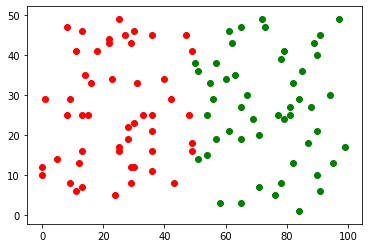

In [20]:
plt.scatter(df['x1'][:50],df['x2'][:50],color='r')
plt.scatter(df['x1'][50:],df['x2'][50:],color='g')

In [18]:
df['x2'][:50]

0     29
1     11
2     25
3     10
4     16
5     19
6     17
7      8
8     25
9     12
10    18
11    47
12     8
13    12
14    29
15    34
16    21
17    33
18    25
19    45
20     6
21     5
22     8
23    25
24    25
25    45
26    35
27    41
28    16
29    14
30    25
31    16
32     7
33    22
34    43
35    23
36    12
37    49
38    13
39    29
40    33
41    16
42    45
43    41
44    43
45    46
46    44
47    34
48    46
49    41
Name: x2, dtype: int32

# Sperate the features and outcomes

In [24]:
outcome=df['y']
features=df[['x1','x2']]
#features = df.drop('y',axis=1)
outcome[0],features.iloc[0]

(0, x1     9
 x2    29
 Name: 0, dtype: int32)

In [23]:
print(type(features))

<class 'pandas.core.frame.DataFrame'>


In [25]:
features

,x1,x2
0,9,29
1,36,11
2,15,25
3,0,10
4,49,16
...,...,...
95,65,47
96,78,39
97,85,36
98,54,15


In [26]:
import math

In [28]:
def Eucledian_distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

In [29]:
Eucledian_distance((4,3),(0,0))

5.0

In [57]:
def knearest_points(p,d):
    distances=[]
    for row in d:
        distances.append(Eucledian_distance(row,p))
    return distances

In [35]:
for row in features.values:
    print(row)
    break

[ 9 29]


In [48]:
knearest_points((5,34),features.values,5)

array([[ 9, 29],
       [ 1, 29],
       [14, 35],
       [11, 41],
       [ 8, 25]])

In [64]:
def knearest_points(p,d,k):
    distances=[]
    for row in d:
        distances.append(Eucledian_distance(row,p))
    distances=np.array(distances)
    return distances.argsort()[:k]

In [46]:
knearest_points((5,34),features.values,4)

array([[ 9, 29],
       [ 1, 29],
       [14, 35],
       [11, 41]])

In [53]:
near_4=knearest_points((5,34),features.values,4)

In [54]:
near_4[:,0]

array([ 9,  1, 14, 11])

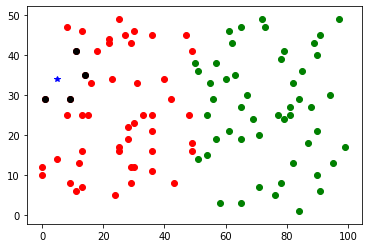

In [56]:
plt.scatter(df['x1'][:50],df['x2'][:50],color='r')
plt.scatter(df['x1'][50:],df['x2'][50:],color='g')
plt.plot(5,34,'b*')
plt.scatter(near_4[:,0],near_4[:,1],color='black')

In [65]:
ind=knearest_points((5,34),features.values,4)

In [66]:
features.values[ind]

array([[ 9, 29],
       [ 1, 29],
       [14, 35],
       [11, 41]])

In [67]:
outcome[ind]

0     0
39    0
26    0
49    0
Name: y, dtype: int32

In [68]:
outcome[ind].value_counts().index[0]

0

In [73]:
def output(p,k,features,outcome):
    ind=knearest_points(p,features.values,k)
    return outcome[ind].value_counts().index[0]
output((34,49),10,features,outcome)

0

In [74]:
for i,feature in features.iterrows():
    print(feature)
    break

x1     9
x2    29
Name: 0, dtype: int32


In [77]:
df.to_csv("data_knn")